In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# 1. IMPORT NECESSARY LIBRARIES

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. LOAD THE DATASET

In [18]:
data_path = '/kaggle/input/netflix-shows/netflix_titles.csv'
netflix_data = pd.read_csv(data_path)

# 3. A GLIMPSE OF OUR DATASET

In [19]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
# Checking the shape of our data
print(f"Shape of data: {netflix_data.shape}")

# Checking the data types of attributes
print(f"Data Types: \n{netflix_data.dtypes}")

Shape of data: (8807, 12)
Data Types: 
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


*The dataset contains **8807** entries and **12** columns.*
*Column **"release_year"** is integer type where as others are object type*

In [21]:
# Basic metrics of numeric column "RELEASE_YEAR"
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


*There are no NAN values in the **"release_year"** column with the oldest entry of 1925 and the latest entry of 2021.*

In [22]:
# Basic metrics of categorical columns
netflix_data[["type", "country", "rating"]].describe(include=["object"])

,type,country,rating
count,8807,7976,8803
unique,2,748,17
top,Movie,United States,TV-MA
freq,6131,2818,3207


* *The column **"type"** has no NAN values, has **2 unique types**, with a majority of movies with 6131 entries.*
* *The column **"country"** has some missing values, with 748 unique countries - **USA** being the majority with 2818 entries.*
* *The column **"rating"** also has some missing values, with 17 unique rating - TV-MA being the majority with 3207 entries*

In [23]:
# Convert the data type of "type", "country", "rating" to category
categorical_cols = ["type", "country", "rating"]
netflix_data[categorical_cols] = netflix_data[categorical_cols].astype("category")

converted_dtype = netflix_data.dtypes
converted_dtype

show_id           object
type            category
title             object
director          object
cast              object
country         category
date_added        object
release_year       int64
rating          category
duration          object
listed_in         object
description       object
dtype: object

In [24]:
vc_type = netflix_data["type"].value_counts()
vc_country = netflix_data["country"].value_counts().head(10)
vc_rating = netflix_data["rating"].value_counts()
vc_release_year = netflix_data["release_year"].value_counts().head(10)

vc_type, vc_country, vc_rating, vc_release_year

(type
 Movie      6131
 TV Show    2676
 Name: count, dtype: int64,
 country
 United States     2818
 India              972
 United Kingdom     419
 Japan              245
 South Korea        199
 Canada             181
 Spain              145
 France             124
 Mexico             110
 Egypt              106
 Name: count, dtype: int64,
 rating
 TV-MA       3207
 TV-14       2160
 TV-PG        863
 R            799
 PG-13        490
 TV-Y7        334
 TV-Y         307
 PG           287
 TV-G         220
 NR            80
 G             41
 TV-Y7-FV       6
 UR             3
 NC-17          3
 74 min         1
 84 min         1
 66 min         1
 Name: count, dtype: int64,
 release_year
 2018    1147
 2017    1032
 2019    1030
 2020     953
 2016     902
 2021     592
 2015     560
 2014     352
 2013     288
 2012     237
 Name: count, dtype: int64)

* *Netflix provides two types of contents - **Movies(6131), TV Shows(2676)**.*
* ***USA** provides most of the content then **India** and **United Kingdom**.*
* Most of the content on Netflix rated **TV-MA, TV-14 and R** indicating a mature content with parental guidance.
* Most of the content was released in **2018, 2017 and 2019**.

# 4. HANDLE MISSING VALUES & OUTLIERS

In [25]:
missing_values = netflix_data.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

*There are some missing values in the columns **"director", "cast", "country", "date_added", "rating", "duration"***

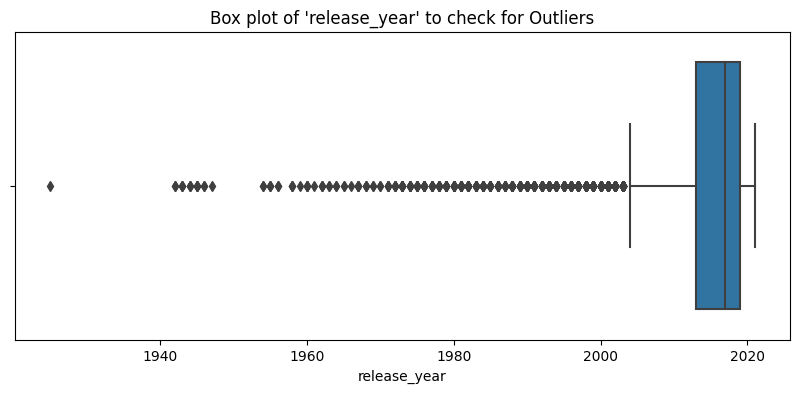

In [26]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=netflix_data['release_year'])
plt.title("Box plot of 'release_year' to check for Outliers")
plt.show()

# 5. UNIVARIATE ANALYSIS

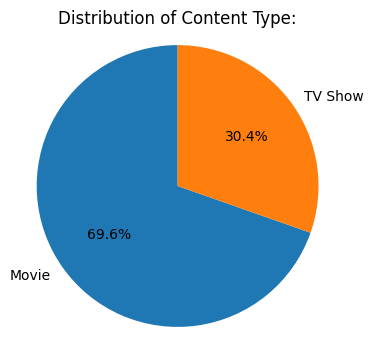

In [27]:
type_counts = netflix_data['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Content Type:")
plt.axis('equal')
plt.show()

*The count of movies is significantly higher than that of TV shows.*

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


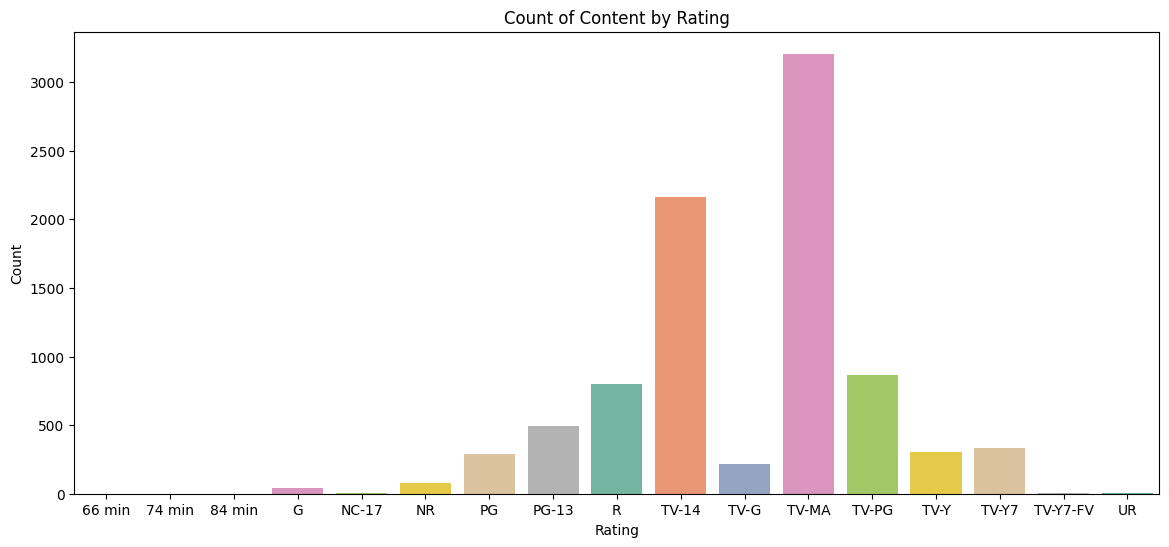

In [28]:
plt.figure(figsize=(14, 6))
sns.countplot(netflix_data, x="rating", palette="Set2")
plt.title("Count of Content by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

*Most of the content received a **"TV-MA"** rating followed by **"TV-14" and "R"** indicating a focus on **mature audiences and teenagers***

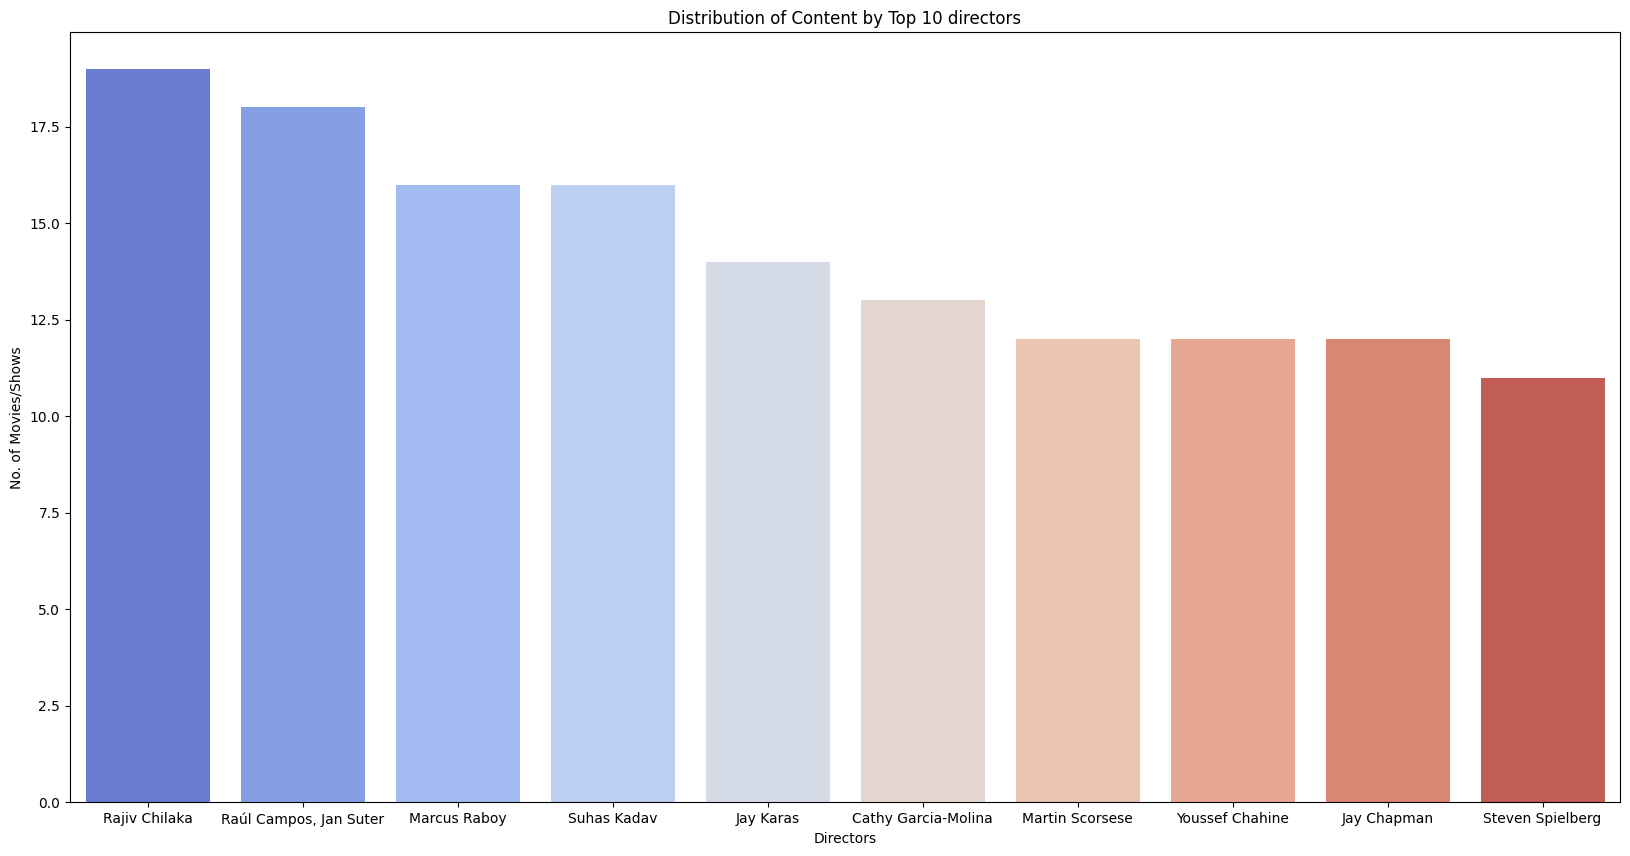

In [29]:
top_directors = netflix_data["director"].value_counts().head(10)
x_label = top_directors.index
y_label = top_directors.values

plt.figure(figsize=(20, 10))
sns.barplot(x=x_label, y=y_label, palette="coolwarm")
plt.title("Distribution of Content by Top 10 directors")
plt.xlabel("Directors")
plt.ylabel("No. of Movies/Shows")
plt.show()

***Rajiv Chilaka** has the most content followed by **Raul Compos, Jan Suter and Marcus Raboy**.*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

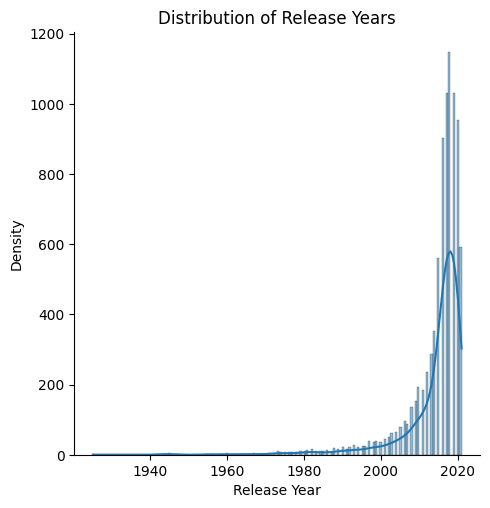

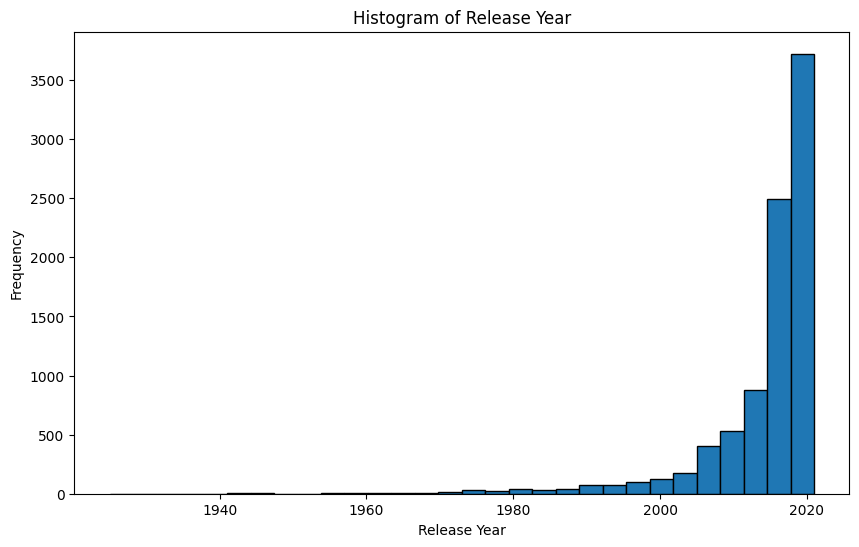

In [30]:
plt.figure(figsize=(10,6))
sns.displot(data=netflix_data['release_year'], kde=True)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(netflix_data['release_year'], bins=30, edgecolor="black")
plt.title("Histogram of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()

*The distribution is right skewed indicating newly released content on Netflix*

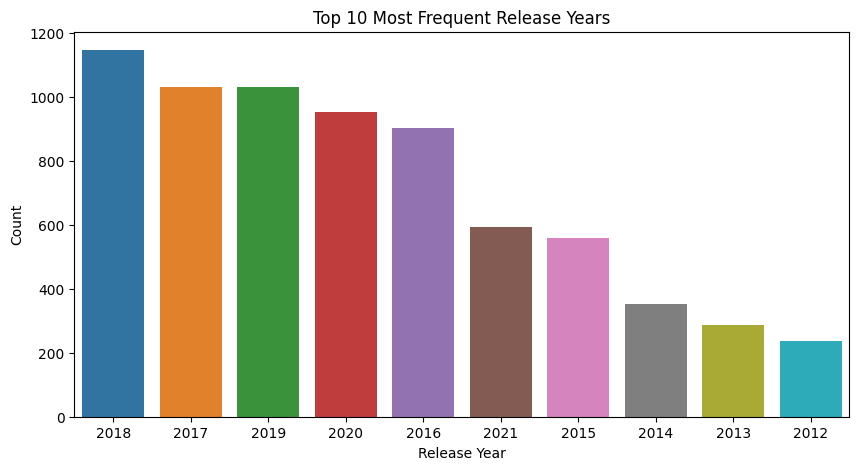

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data=netflix_data, x='release_year', order=netflix_data['release_year'].value_counts().iloc[:10].index)
plt.title("Top 10 Most Frequent Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

# 6. BIVARIATE ANALYSIS

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


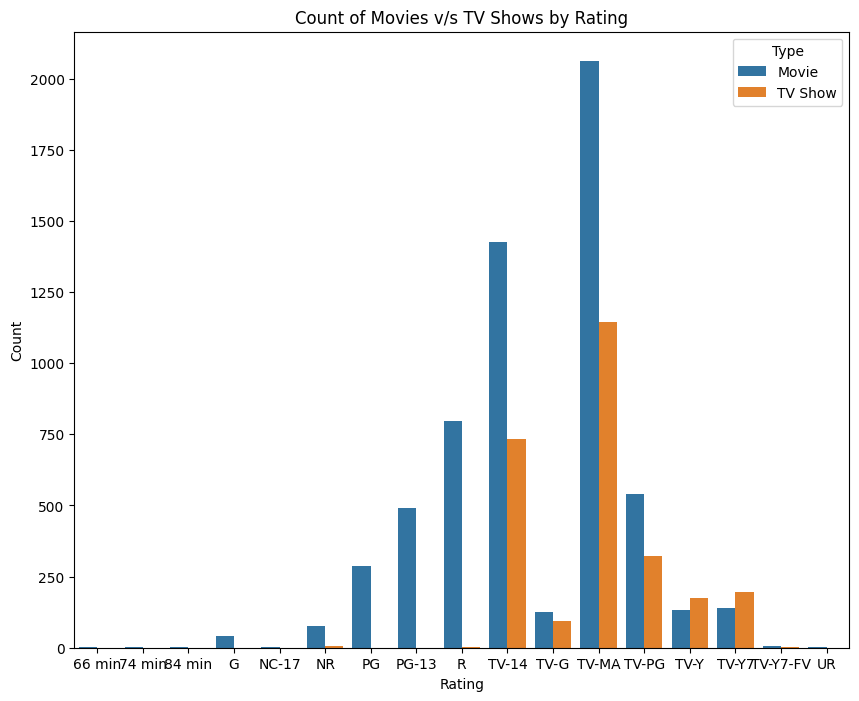

In [47]:
# Relationship between Type and Rating
plt.figure(figsize=(10,4))
sns.countplot(x='rating', hue='type', data=netflix_data)
plt.title("Count of Movies v/s TV Shows by Rating")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

*Both Movies and TV shows fall under the **TV-MA and TV-14** ratings*

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


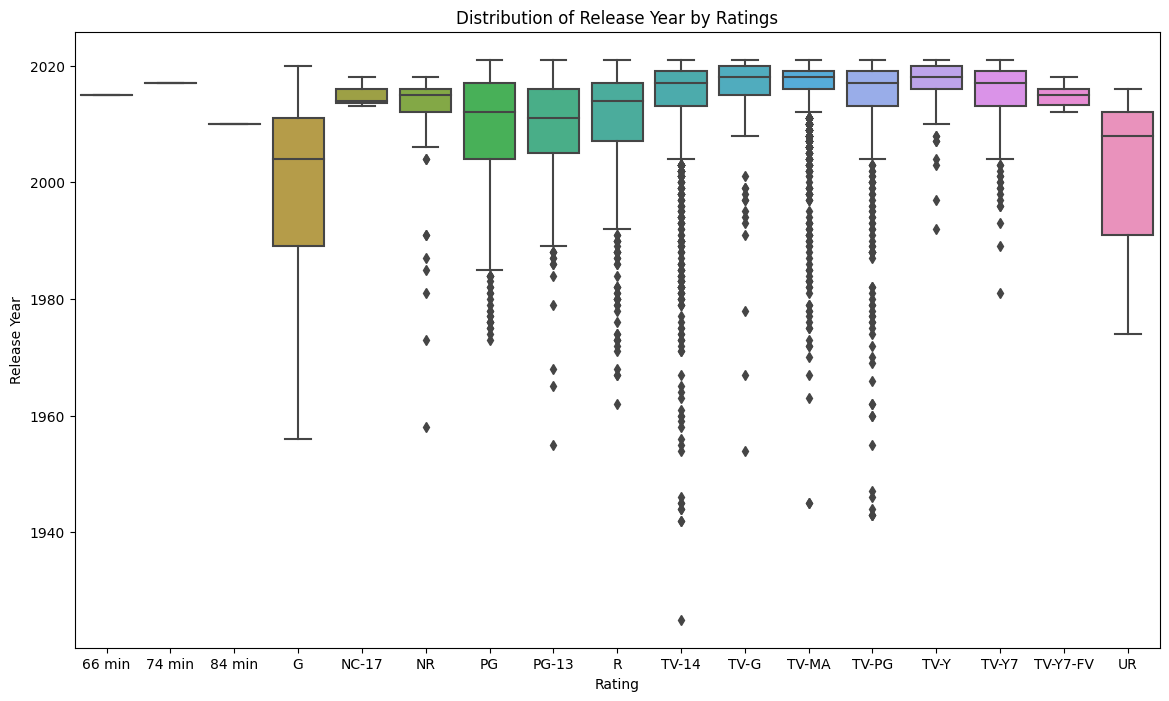

In [50]:
# Boxplot for rating vs erlease_year
plt.figure(figsize=(14, 8))
sns.boxplot(data=netflix_data, x='rating', y='release_year')
plt.title("Distribution of Release Year by Ratings")
plt.xlabel("Rating")
plt.ylabel("Release Year")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


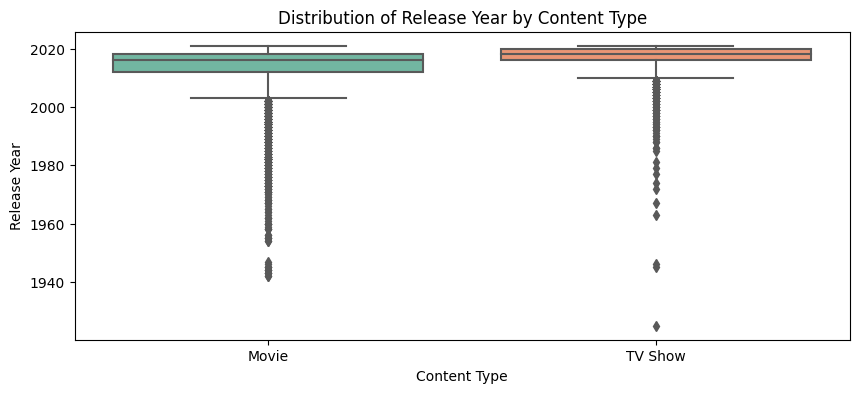

In [58]:
# Relationship between Type and Release Year
plt.figure(figsize=(10, 4))
sns.boxplot(data=netflix_data, x='type', y='release_year', palette="Set2")
plt.title("Distribution of Release Year by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Release Year")
plt.show()

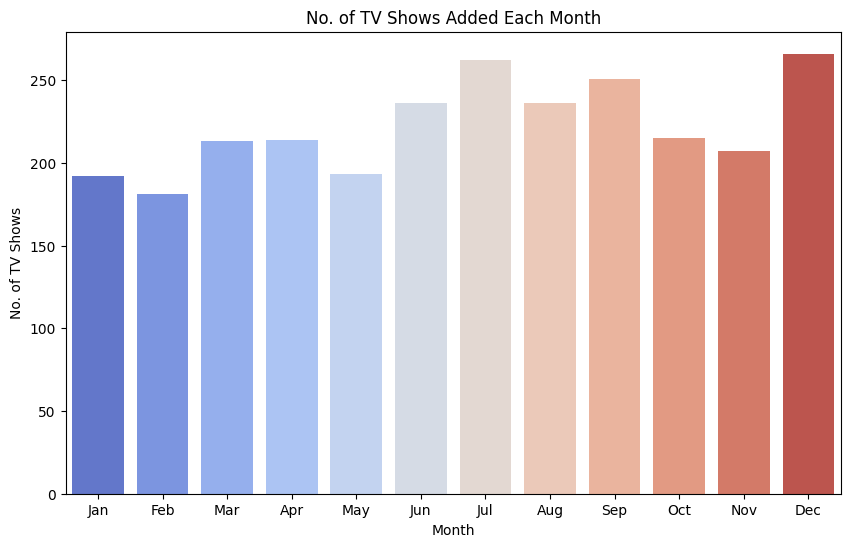

In [86]:
# Filter dataset by tv shows
tv_shows = netflix_data[netflix_data['type']=='TV Show'].copy()

tv_shows['date_added'] = pd.to_datetime(tv_shows['date_added'].str.strip(), errors='coerce')
tv_shows['month_added'] = tv_shows['date_added'].dt.month

monthly_additions = tv_shows['month_added'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette='coolwarm')
plt.title("No. of TV Shows Added Each Month")
plt.xlabel("Month")
plt.ylabel("No. of TV Shows")
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()